# y= relu ( (X․W ) + b )

In [6]:
import tensorflow as tf

X = tf.Variable([[0.4, 0.2, 0.4]])

W = tf.Variable([[-0.5, -0.2],
                 [-0.3, 0.4],
                 [-0.5, 0.2]])

b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X, W) + b

y = tf.nn.relu(tf.matmul(X, W) + b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')
    print(sess.run(XWb))
    print('y:')
    print(sess.run(y))

XWb:
[[-0.36000004  0.28      ]]
y:
[[ 0.    0.28]]


# y= sigmoid ( (X․W ) + b )

In [4]:
import tensorflow as tf

X = tf.Variable([[2.0, 1, 3]])
W = tf.Variable([[-0.5, -0.2],
                 [-0.3, 0.4],
                 [-0.5, 0.2]])
b = tf.Variable([1.0, 2])
XWb = tf.matmul(X, W) + b

y = tf.nn.sigmoid(tf.matmul(X, W) + b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')
    print(sess.run(XWb))
    print('y:')
    print(sess.run(y))

XWb:


[[-1.79999995  2.5999999 ]]
y:
[[ 0.14185107  0.93086159]]


# 以亂數產生Weight(W)與bais(b) 

In [7]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4, 0.2, 0.4]])
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:')
    print(sess.run(b))
    print('W:')
    print(sess.run(W))
    print('y:')
    print(sess.run(y))

b:
[[ 0.13692647  1.41081786]]
W:
[[ 0.54910606  1.31788528]
 [-2.98850489 -0.42417884]
 [-0.70707983 -0.02972651]]
y:
[[ 0.          1.84124565]]


[-0.23656665 -0.75966907]


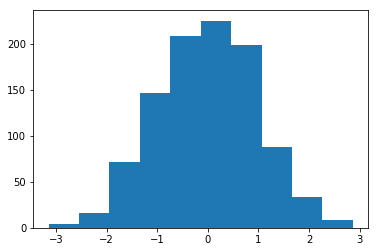

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
    data = tf.random_normal([1000]).eval()
print(data[:2])

plt.hist(data)
plt.show()

# placeholder

In [3]:
import tensorflow as tf
import numpy as np

W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(X, W) + b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.1, 0.2, 0.3],
                        [0.2, 0.3, 0.4]])
    (_b, _W, _X, _y) = sess.run((b, W, X, y), feed_dict={X: X_array})
    print('b : ')
    print(_b)
    print('W : ')
    print(_W)
    print('X : ')
    print(_X)
    print('y : ')
    print(_y)

b : 
[[ 0.39942372 -1.76145756]]
W : 
[[ 1.67420912  0.04150477]
 [ 1.56263268  2.06695151]
 [-0.72445256 -0.91310525]]
X : 
[[ 0.1         0.2         0.30000001]
 [ 0.2         0.30000001  0.40000001]]
y : 
[[ 0.66203541  0.        ]
 [ 0.91327435  0.        ]]


# 建立Layer函數模擬神經網路

In [4]:
import tensorflow as tf

def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

# 使用Layer函數建立三層類神經網路

In [5]:
X = tf.placeholder('float', [None, 4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.3, 0.1],
                        [0.1, 0.2, 0.3, 0.4]])
    (layer_X, layer_h, layer_y) = sess.run((X, h, y), feed_dict={X: X_array})
    print('input layer X')
    print(layer_X)
    print('input layer h')
    print(layer_h)
    print('input layer y')
    print(layer_y)

input layer X
[[ 0.40000001  0.2         0.30000001  0.1       ]
 [ 0.1         0.2         0.30000001  0.40000001]]
input layer h
[[ 0.          1.47170472  0.        ]
 [ 0.          0.64114058  0.        ]]
input layer y
[[-1.21138895  1.75492954]
 [ 0.0164324   0.89288759]]
